In [20]:
import pandas as pd
import geopandas
# data = pd.read_csv('../cross_lochs_gdf.csv')

# data = pd.read_csv('../cross_lochs_6_classes_for_ML.csv')
# data = pd.read_csv('../train_test_data.csv')
data = pd.read_csv('../train_test_data_2006_only.csv')

In [21]:
import numpy as np
from sklearn.decomposition import PCA

In [22]:
from sklearn.preprocessing import StandardScaler

x = data[data.columns[1:359]]
y = data[data.columns[362]]

x = StandardScaler().fit_transform(x)


# from sklearn.decomposition import PCA
# pca = PCA(n_components=6)
# principalComponents = pca.fit_transform(x)
# principalDf = pd.DataFrame(data = principalComponents
#              , columns = ['pc_1', 'pc_2', 'pc_3', 'pc_4', 'pc_5', 'pc_6'])

# from sklearn.decomposition import PCA
# pca = PCA(n_components=13)
# principalComponents = pca.fit_transform(x)
# principalDf = pd.DataFrame(data = principalComponents
#              , columns = ['pc_1', 'pc_2', 'pc_3', 'pc_4', 'pc_5', 'pc_6', 'pc_7', 'pc_8', 'pc_9', 'pc_10', 'pc_11', 'pc_12', 'pc_13'])

from sklearn.decomposition import PCA
pca = PCA(n_components=10)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pc_1', 'pc_2', 'pc_3', 'pc_4', 'pc_5', 'pc_6', 'pc_7', 'pc_8', 'pc_9', 'pc_10'])


pca_df = pd.concat([principalDf, data[['PFT']], data[['geometry']]], axis = 1)


pca_df['geometry'] = geopandas.GeoSeries.from_wkt(pca_df['geometry'])

pca_gdf = geopandas.GeoDataFrame(pca_df, geometry='geometry')

pca_gdf.head(2)


,pc_1,pc_2,pc_3,pc_4,pc_5,pc_6,pc_7,pc_8,pc_9,pc_10,PFT,geometry
0,4.664016,5.672772,-5.515022,-4.521477,1.385060,-0.982944,-0.404098,-0.170281,-2.05849,0.148007,bare,POINT (442880.734 6471623.338)
1,-7.887519,13.159138,-0.894302,2.674378,0.887051,-3.465438,0.140782,0.633508,-0.76273,1.715422,bare,POINT (443420.734 6471608.338)


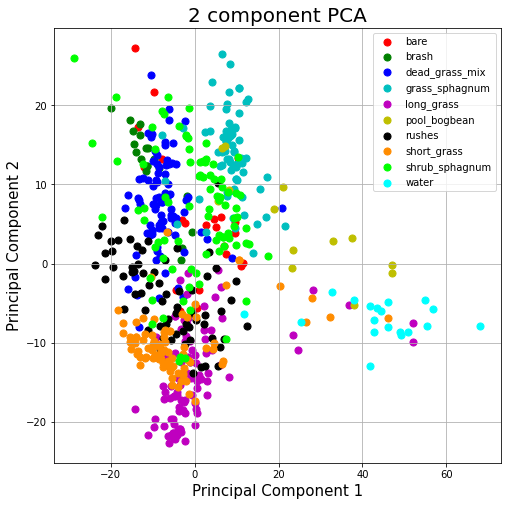

In [23]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
# PFTs = ['water', 'shrub_sphagnum', 'rushes_sedges', 'calluna_mix', 'sphagnum_r', 'bare_water', 'pool_bogbean']
# PFTs = ['calluna', 'bare', 'brash', 'water', 'rushes', 'pool_bogbean', 'short_grass', 'long_grass', 'grass_sphagnum', 'dead_grass_mix', 'sitka_pine', 'agri_grasses', 'shrub_sphagnum']
PFTs = ['bare', 'brash', 'water', 'rushes', 'pool_bogbean', 'short_grass', 'long_grass', 'grass_sphagnum', 'dead_grass_mix', 'shrub_sphagnum']
PFTs = sorted(PFTs)
# colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'darkorange', 'lime', 'aqua', 'fuchsia', 'yellowgreen', 'purple']

for PFT, color in zip(PFTs,colors):
    indicesToKeep = pca_df['PFT'] == PFT
    ax.scatter(pca_df.loc[indicesToKeep, 'pc_1']
               , pca_df.loc[indicesToKeep, 'pc_2']
               , c = color
               , s = 50)
ax.legend(PFTs)
ax.grid()

In [114]:
explained_variance = pca.explained_variance_ratio_

explained_variance

# not distinct clusters for some of thedata, suggests won't that strong at predicting outcomes

array([0.84747868, 0.12860474, 0.0087702 , 0.00578015, 0.00250596,
       0.00128377])

Text(0, 0.5, 'Proportion of Variance Explained')

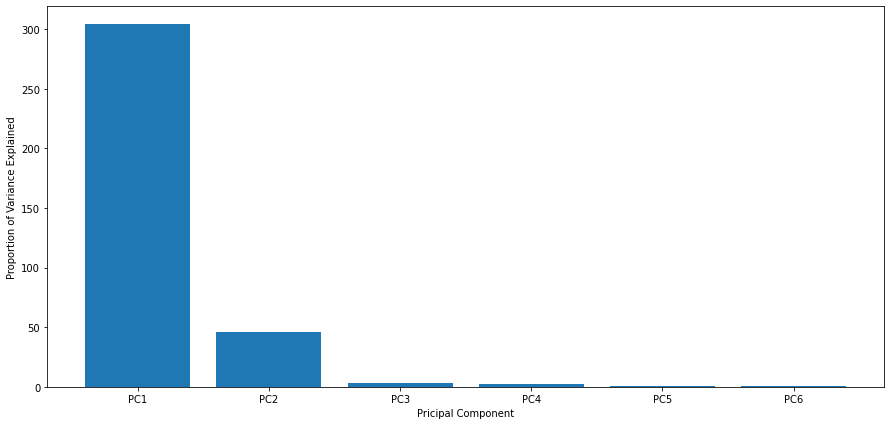

In [115]:
var = pca.explained_variance_[0:6] #percentage of variance explained
labels = ['PC1','PC2','PC3','PC4','PC5','PC6']

plt.figure(figsize=(15,7))
plt.bar(labels,var,)
plt.xlabel('Pricipal Component')
plt.ylabel('Proportion of Variance Explained')

In [116]:
import pandas as pd
import geopandas
import sklearn.metrics as metric
import statsmodels.api as sm

data = pd.read_csv('../data_6_classes_for_ML.csv')
# data = pd.read_csv('../transformed_spectral_signatures/first_derivative_98_sample.csv')
# data = pd.read_csv('../transformed_spectral_signatures/BDNA_98_sample.csv')

data['geometry'] = geopandas.GeoSeries.from_wkt(data['geometry'])

data_gdf = geopandas.GeoDataFrame(data, geometry='geometry')

from sklearn.model_selection import train_test_split


train_shrub_sphagnum, test_shrub_sphagnum = train_test_split(data_gdf[data_gdf['PFT'].str.contains('shrub_sphagnum')], test_size=0.3)
train_water, test_water = train_test_split(data_gdf[data_gdf['PFT'].str.contains('water')], test_size=0.3)
train_sphagnum_r, test_sphagnum_r = train_test_split(data_gdf[data_gdf['PFT'].str.contains('spahgnum_r')], test_size=0.3)
train_pool_bogbean, test_pool_bogbean = train_test_split(data_gdf[data_gdf['PFT'].str.contains('pool_bogbean')], test_size=0.3)
train_calluna_mix, test_calluna_mix = train_test_split(data_gdf[data_gdf['PFT'].str.contains('calluna_mix')], test_size=0.3)
train_rushes_sedges, test_rushes_sedges = train_test_split(data_gdf[data_gdf['PFT'].str.contains('rushes_sedges')], test_size=0.3)


train_frames = [train_shrub_sphagnum, train_water, train_sphagnum_r, train_pool_bogbean, train_calluna_mix, train_rushes_sedges]
test_frames = [test_shrub_sphagnum, test_water, test_sphagnum_r, test_pool_bogbean, test_calluna_mix, test_rushes_sedges]


train = pd.concat(train_frames)
test = pd.concat(test_frames)

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [80]:
# pca_gdf.to_file("data_pca.shp")

/tmp/ipykernel_1868/842022299.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  pca_gdf.to_file("cross_lochs_pca.shp")


In [85]:
pca_gdf.to_csv("data_pca.csv")